In [4]:
import sys
sys.path.append('../src/')
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import json
import scipy
from antenna import Antenna
import itertools

In [5]:
with open("../config.json", 'r') as cfg:
    params = json.load(cfg)

antenna_params = params["antenna_params"]
opt_params = params["optimisation_params"]

In [6]:
antenna = Antenna(antenna_params)

In [7]:
antenna.set_objective(weights=[1.0, 1.0])
antenna.set_jacobian(weights=[1.0, 1.0])
antenna.set_hessian(weights=[1.0, 1.0])

In [30]:
A_i = antenna.afs[0]

In [42]:
Q_k = np.real(A_i[30, :].reshape(1, -1).conj().T @ A_i[30, :].reshape(1, -1))

In [43]:
Q_k

array([[ 1.        , -0.9127242 ,  0.66613092, -0.30326343, -0.11253919,
         0.5086979 , -0.81606259,  0.98098224, -0.97466986,  0.7982273 ],
       [-0.9127242 ,  1.        , -0.9127242 ,  0.66613092, -0.30326343,
        -0.11253919,  0.5086979 , -0.81606259,  0.98098224, -0.97466986],
       [ 0.66613092, -0.9127242 ,  1.        , -0.9127242 ,  0.66613092,
        -0.30326343, -0.11253919,  0.5086979 , -0.81606259,  0.98098224],
       [-0.30326343,  0.66613092, -0.9127242 ,  1.        , -0.9127242 ,
         0.66613092, -0.30326343, -0.11253919,  0.5086979 , -0.81606259],
       [-0.11253919, -0.30326343,  0.66613092, -0.9127242 ,  1.        ,
        -0.9127242 ,  0.66613092, -0.30326343, -0.11253919,  0.5086979 ],
       [ 0.5086979 , -0.11253919, -0.30326343,  0.66613092, -0.9127242 ,
         1.        , -0.9127242 ,  0.66613092, -0.30326343, -0.11253919],
       [-0.81606259,  0.5086979 , -0.11253919, -0.30326343,  0.66613092,
        -0.9127242 ,  1.        , -0.9127242 

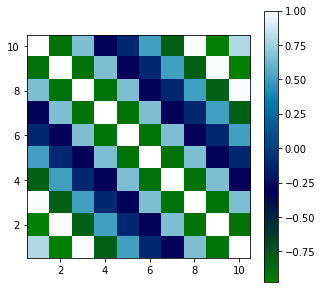

In [47]:
plt.figure(figsize=(5, 5))
plt.imshow(Q_k, interpolation='nearest', cmap=plt.cm.ocean, extent=(0.5,10.5,0.5,10.5))
plt.colorbar()
plt.show()


In [34]:
Q_k[:, 1] = 0
Q_k[1, :] = 0

Q_k[:, 5] = 0
Q_k[5, :] = 0

Q_k[:, 9] = 0
Q_k[9, :] = 0

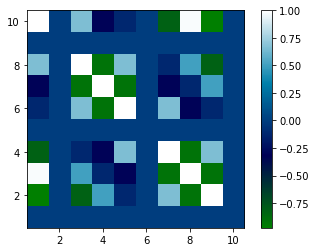

In [35]:
plt.imshow(Q_k, interpolation='nearest', cmap=plt.cm.ocean, extent=(0.5,10.5,0.5,10.5))
plt.colorbar()
plt.show()

In [36]:
np.linalg.matrix_rank(Q_k)

2

In [ ]:
optI, _, _ = antenna.get_optimal_current_allocation(opt_params)

In [ ]:
antenna.plot_current_distribution()

In [ ]:
optI

In [ ]:
configurations = list(itertools.product(np.arange(antenna.n_currents), repeat=antenna.N))
configurations = [(0, 1, 1, 0, 0, 1, 1, 1, 0, 1)]
for conf in configurations:
    temp = np.zeros_like(optI)
    for i, elem in enumerate(conf):
        temp[elem, i] = True
    optI = optI * temp

In [ ]:
optI[optI == 0] = -np.inf

In [ ]:
optI

In [ ]:
def set_currents(listJ, conf):
    J_mtx = np.array(listJ)
    temp = np.zeros_like(J_mtx)
    for i, elem in enumerate(conf):
        temp[elem, i] = True
    J_mtx = J_mtx * temp
    J_mtx[J_mtx == 0] = -np.inf
    return J_mtx

In [ ]:
set_currents(optI, (0, 1, 1, 0, 0, 1, 1, 1, 0, 1))

In [ ]:
optI